# Secretory Index

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

### Loading data

In [2]:
genes=np.load("genes_tpm_v11_clean.npy",allow_pickle=True)
samples=np.load("samples_tpm_v11_clean.npy",allow_pickle=True)
X=np.load("results_tpm_v11_clean.npy",allow_pickle=True)
results=pd.DataFrame(X,index=genes,columns=samples)

In [3]:
results.shape

(20846, 71939)

In [4]:
results.head(10)

,GSM741172,GSM741170,GSM741171,GSM907015,GSM1193921,GSM1098188,GSM1193928,GSM1048186,GSM1216828,GSM1241249,...,GSM5572862,GSM5577332,GSM5577333,GSM5577334,GSM5577335,GSM5577336,GSM5577337,GSM5580099,GSM5580100,GSM5580102
A1BG,1.514984,1.316501,0.945544,12.863701,71.141045,0.738105,134.292114,10.272301,2.855723,0.000000,...,0.778685,6.074946,6.227352,5.103860,8.809099,7.493229,7.746690,42.761230,35.295048,35.235378
A1CF,0.208822,0.199274,0.138544,0.058604,0.301775,0.034464,1.374310,0.267306,13.903001,0.000000,...,0.163493,0.129097,0.266828,0.162259,0.165147,0.261044,0.246418,0.013703,0.031029,0.020903
A2M,61.154045,141.594360,62.881958,109.156868,0.000000,313.137146,0.000000,216.393066,22.510412,0.000000,...,0.000000,0.130720,0.426572,0.000000,0.507422,0.200596,0.000000,314.406342,426.812805,311.372803
A2ML1,0.373835,0.262869,0.266668,0.799892,0.655797,0.109945,0.366945,4.065595,0.190527,1.748747,...,0.112173,1.403640,2.326312,2.850472,3.334096,3.415315,2.629406,0.064991,0.255675,0.041696
A3GALT2,0.722773,1.094620,0.645631,0.000000,0.000000,0.458957,0.000000,4.969500,0.000000,0.000000,...,0.000000,0.457722,0.104935,0.179656,0.000000,0.313955,0.304647,0.000000,0.000000,0.151392
A4GALT,36.032150,37.229839,33.279217,1.015697,142.980347,36.433231,183.780090,10.563320,2.462949,0.701296,...,18.059050,5.627535,7.101623,7.093668,7.457928,5.663228,7.826350,0.033709,0.000000,0.000000
A4GNT,0.030812,0.000000,0.000000,1.430780,0.492563,0.048803,0.495588,0.000000,0.030563,0.000000,...,0.000000,0.080976,0.055640,0.047948,0.247546,0.278913,0.000000,0.389952,0.440706,0.318720
AAAS,53.506466,53.790775,47.527954,25.903215,273.925598,45.429768,232.081818,51.678558,29.881355,19.422600,...,42.163074,101.262016,90.680084,89.193260,108.643570,118.603142,114.563354,43.215916,49.570923,31.762648
AACS,26.146168,27.670322,21.757446,6.195911,147.421265,16.951571,158.819473,82.181786,35.755089,5.364279,...,20.739130,56.814789,61.199211,58.207676,86.674706,76.521614,72.830887,9.762825,13.572193,6.115163
AADAC,0.000000,0.000000,0.029989,0.000000,1.010896,0.053091,0.000000,0.000000,4.121410,0.000000,...,6.539280,28.195078,28.989920,32.772701,41.584599,38.772194,38.207401,0.000000,0.000000,0.000000


In [5]:
id_mapping=pd.read_csv("id_mapping_V11_clean.csv",usecols=["ens_gids","gene_symbol"])

In [6]:
id_mapping.head()

,gene_symbol,ens_gids
0,IGHD3-10,ENSG00000282373
1,IGHD3-9,ENSG00000281939
2,IGHD2-8,ENSG00000282132
3,IGHD3-16,ENSG00000211917
4,IGHD3-3,ENSG00000282754


In [7]:
id_mapping.set_index("gene_symbol",drop=False,inplace=True)

In [8]:
id_mapping.head()

,gene_symbol,ens_gids
gene_symbol,,
IGHD3-10,IGHD3-10,ENSG00000282373
IGHD3-9,IGHD3-9,ENSG00000281939
IGHD2-8,IGHD2-8,ENSG00000282132
IGHD3-16,IGHD3-16,ENSG00000211917
IGHD3-3,IGHD3-3,ENSG00000282754


In [9]:
id_mapping.shape

(159052, 2)

In [10]:
for gene in results.index.values:
    if gene not in id_mapping.index.values:
        print(gene)

In [11]:
id_mapping.drop_duplicates(subset="gene_symbol",keep="first",inplace=True)

In [12]:
id_mapping=id_mapping.loc[results.index.values]

In [13]:
tmp=[]
for gene in results.index.values:
    if gene not in id_mapping.index.values:
        tmp.append(gene)

In [14]:
len(tmp)

0

In [15]:
id_mapping.head()

,gene_symbol,ens_gids
gene_symbol,,
A1BG,A1BG,ENSG00000121410
A1CF,A1CF,ENSG00000148584
A2M,A2M,ENSG00000175899
A2ML1,A2ML1,ENSG00000166535
A3GALT2,A3GALT2,ENSG00000184389


In [16]:
id_mapping.shape

(20846, 2)

In [17]:
len(set(id_mapping.index.values))

20846

In [18]:
tmp=[]
duplicated=[]
for gene in id_mapping.index.values:
    if gene not in tmp:
        tmp.append(gene)
    else:
        duplicated.append(gene)

In [19]:
len(set(duplicated))

0

## Generating common secretome list

### Loading secretome from HPA

In [20]:
#hpa_secretome=pd.read_csv("sa_location_Secreted_01052020.tsv",sep="\t")

In [21]:
hpa_secretome=pd.read_csv("sa_location_Secreted_hpa_270122.tsv",sep="\t")

In [22]:
len(hpa_secretome)

1903

In [23]:
hpa_secretome.head()

,Gene,Gene synonym,Ensembl,Gene description,Uniprot,Chromosome,Position,Protein class,Biological process,Molecular function,...,Single Cell Type RNA - Smooth muscle cells [nTPM],Single Cell Type RNA - Spermatocytes [nTPM],Single Cell Type RNA - Spermatogonia [nTPM],Single Cell Type RNA - Squamous epithelial cells [nTPM],Single Cell Type RNA - Suprabasal keratinocytes [nTPM],Single Cell Type RNA - Syncytiotrophoblasts [nTPM],Single Cell Type RNA - T-cells [nTPM],Single Cell Type RNA - Theca cells [nTPM],Single Cell Type RNA - Undifferentiated cells [nTPM],Single Cell Type RNA - Urothelial cells [nTPM]
0,A1BG,NaN,ENSG00000121410,Alpha-1-B glycoprotein,P04217,19,58345178-58353492,"Plasma proteins, Predicted intracellular prote...",NaN,NaN,...,43.8,4.1,7.9,1.5,3.7,1.9,52.6,0.7,0.2,0.6
1,A2M,"CPAMD5, FWP007, S863-7",ENSG00000175899,Alpha-2-macroglobulin,P01023,12,9067664-9116229,"Cancer-related genes, Candidate cardiovascular...",NaN,"Protease inhibitor, Serine protease inhibitor",...,328.0,2.7,8.8,8.2,14.1,4.1,13.0,73.3,0.0,3.6
2,A2ML1,"CPAMD9, FLJ25179, p170",ENSG00000166535,Alpha-2-macroglobulin like 1,A8K2U0,12,8822621-8887001,"Disease related genes, Predicted intracellular...",NaN,"Protease inhibitor, Serine protease inhibitor",...,0.3,1.0,0.4,127.6,12.6,0.1,0.1,1.9,0.0,8.2
3,AADACL2,MGC72001,ENSG00000197953,Arylacetamide deacetylase like 2,Q6P093,3,151733916-151761339,Predicted secreted proteins,NaN,Hydrolase,...,0.1,0.0,0.0,0.1,30.7,0.1,0.1,0.0,0.0,0.0
4,ABHD15,NaN,ENSG00000168792,Abhydrolase domain containing 15,Q6UXT9,17,29560547-29567037,Predicted secreted proteins,NaN,Hydrolase,...,1.9,0.8,0.6,2.0,2.4,0.3,11.8,4.5,7.4,1.2


In [24]:
hpa_missing=[]
hpa_included=[]
for gene in hpa_secretome.Ensembl.values:
    if gene not in id_mapping.ens_gids.values:
        hpa_missing.append(gene)
    else:
        hpa_included.append(gene)

In [25]:
len(hpa_missing)

123

In [26]:
hpa_secretome.set_index("Ensembl",drop=False,inplace=True)

In [27]:
hpa_secretome.loc[hpa_missing]["Gene"]

Ensembl
ENSG00000175164         ABO
ENSG00000100312         ACR
ENSG00000160323    ADAMTS13
ENSG00000204305        AGER
ENSG00000204444        APOM
                     ...   
ENSG00000168477        TNXB
ENSG00000189068       VSTM1
ENSG00000204396        VWA7
ENSG00000108379        WNT3
ENSG00000162078       ZG16B
Name: Gene, Length: 123, dtype: object

In [28]:
hpa_missing2=[]
hpa_symbol_included=[]
for gene in hpa_secretome.loc[hpa_missing]["Gene"]:
    if gene not in id_mapping.gene_symbol.values:
        hpa_missing2.append(gene)
    else:
        hpa_symbol_included.append(gene)

In [29]:
len(hpa_missing2)

6

In [30]:
hpa_secretome.set_index("Gene",drop=False,inplace=True)

In [31]:
hpa_secretome.loc[hpa_missing2]

,Gene,Gene synonym,Ensembl,Gene description,Uniprot,Chromosome,Position,Protein class,Biological process,Molecular function,...,Single Cell Type RNA - Smooth muscle cells [nTPM],Single Cell Type RNA - Spermatocytes [nTPM],Single Cell Type RNA - Spermatogonia [nTPM],Single Cell Type RNA - Squamous epithelial cells [nTPM],Single Cell Type RNA - Suprabasal keratinocytes [nTPM],Single Cell Type RNA - Syncytiotrophoblasts [nTPM],Single Cell Type RNA - T-cells [nTPM],Single Cell Type RNA - Theca cells [nTPM],Single Cell Type RNA - Undifferentiated cells [nTPM],Single Cell Type RNA - Urothelial cells [nTPM]
Gene,,,,,,,,,,,,,,,,,,,,,
ERVH48-1,ERVH48-1,"C21orf105, NDUFV3-AS1, SUPYN",ENSG00000233056,Endogenous retrovirus group 48 member 1,M5A8F1,21,42916803-42925646,"Predicted intracellular proteins, Predicted se...",NaN,NaN,...,0.0,0.1,0.4,0.0,0.0,88.8,0.0,0.0,0.0,0.0
IGHD1-1,IGHD1-1,IGHD11,ENSG00000236170,Immunoglobulin heavy diversity 1-1,P0DOY5,14,105919502-105919518,"Immunoglobulin genes, Predicted intracellular ...","Adaptive immunity, Immunity",NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
IGHV8-51-1,IGHV8-51-1,"IGHV(III)-51-1, IGHVIII-51-1",ENSG00000254167,Immunoglobulin heavy variable IGHV8-51-1 (non-...,NaN,14,106583501-106583807,"Immunoglobulin genes, Predicted intracellular ...",NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
OOSP3,OOSP3,NaN,ENSG00000285231,Oocyte secreted protein family member 3,A0A2R8YFM6,11,59878809-59896481,Predicted secreted proteins,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
OOSP4A,OOSP4A,NaN,ENSG00000285010,Oocyte secreted protein family member 4A,A0A2R8YFL7,11,59964033-59970146,Predicted secreted proteins,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
OOSP4B,OOSP4B,NaN,ENSG00000255393,Oocyte secreted protein family member 4B,A0A2R8Y4Y8,11,59978020-60031077,"Predicted intracellular proteins, Predicted se...",NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
hpa_secretome.loc[hpa_missing2].to_csv("HPA_missing.csv")

Only 6/1903 genes of the secretome from HPA were not present in the archs4 dataset, they could have another synonym. Missing genes were manually searched however, it was verified that they are not present in ArChS4 dataset.

In [33]:
len(hpa_included+hpa_symbol_included)

1897

In [34]:
len(set(hpa_included+hpa_symbol_included))

1897

### Loading secretome from uniprot (this list contains synonyms)

In [35]:
secretome_uniprot=pd.read_excel("uniprot-secretome_270122.xlsx",usecols=[1,2,3,6,7])
secretome_uniprot.columns=["protein_name","synonym","primary_gene_name","ens_tid","gene_ID"]

In [36]:
secretome_uniprot.head()

,protein_name,synonym,primary_gene_name,ens_tid,gene_ID
0,Transmembrane protease serine 11E (EC 3.4.21.-...,DESC1 TMPRSS11E2,TMPRSS11E,ENST00000305363;,28983;
1,Lymphotoxin-alpha (LT-alpha) (TNF-beta) (Tumor...,TNFB TNFSF1,LTA,ENST00000412851;ENST00000418386;ENST0000042684...,4049;
2,Metalloproteinase inhibitor 2 (CSC-21K) (Tissu...,NaN,TIMP2,ENST00000262768;,7077;
3,Vascular endothelial growth factor receptor 3 ...,VEGFR3,FLT4,ENST00000261937 [P35916-2];ENST00000393347 [P3...,2324;
4,Protein Wnt-4,NaN,WNT4,ENST00000290167 [P56705-1];,54361;


In [37]:
#secretome_uniprot=pd.read_csv("uniprot_secreted_03052020.tsv",sep="\t",usecols=[3,4,8,9,11])
#secretome_uniprot.columns=["protein_name","gene_name","primary_gene_name","synonym","gene_ID"]

In [38]:
#secretome_uniprot.head()

In [39]:
secretome_uniprot.shape

(2083, 5)

Eliminanting null rows

In [40]:
secretome_uniprot[secretome_uniprot.gene_ID.isnull()&secretome_uniprot.primary_gene_name.isnull()]

,protein_name,synonym,primary_gene_name,ens_tid,gene_ID
29,Putative uncharacterized protein ENSP00000380674,NaN,NaN,NaN,NaN
72,Putative uncharacterized protein FLJ46089,NaN,NaN,NaN,NaN
199,Uncharacterized protein UNQ6126/PRO20091,NaN,NaN,NaN,NaN
232,Putative uncharacterized protein UNQ6190/PRO20217,NaN,NaN,NaN,NaN
262,Putative uncharacterized protein PRO2829,NaN,NaN,NaN,NaN
269,Putative uncharacterized protein UNQ9165/PRO28630,NaN,NaN,NaN,NaN
274,Putative uncharacterized protein UNQ6494/PRO21346,NaN,NaN,NaN,NaN
287,Putative uncharacterized protein UNQ5830/PRO19...,NaN,NaN,NaN,NaN
342,Putative chemokine-related protein FP248 (Prot...,NaN,NaN,NaN,NaN
343,Putative uncharacterized protein ENSP00000381830,NaN,NaN,NaN,NaN


In [41]:
secretome_uniprot.drop(secretome_uniprot[secretome_uniprot.gene_ID.isnull()&secretome_uniprot.primary_gene_name.isnull()].index.values,inplace=True)

In [42]:
secretome_uniprot.shape

(2073, 5)

In [43]:
len(set(secretome_uniprot.primary_gene_name.values))# find duplicates

2072

In [44]:
secretome_uniprot.set_index("primary_gene_name",drop=False,inplace=True)

In [45]:
secretome_uniprot[secretome_uniprot.index.duplicated()]

,protein_name,synonym,primary_gene_name,ens_tid,gene_ID
primary_gene_name,,,,,
CALCA,Calcitonin gene-related peptide 1 (Alpha-type ...,CALC1,CALCA,ENST00000361010 [P06881-1];ENST00000486207 [P0...,796;


In [46]:
secretome_uniprot.loc["CALCA"]

,protein_name,synonym,primary_gene_name,ens_tid,gene_ID
primary_gene_name,,,,,
CALCA,Calcitonin [Cleaved into: Calcitonin; Katacalc...,CALC1,CALCA,ENST00000331587 [P01258-1];ENST00000396372 [P0...,796;
CALCA,Calcitonin gene-related peptide 1 (Alpha-type ...,CALC1,CALCA,ENST00000361010 [P06881-1];ENST00000486207 [P0...,796;


In [47]:
secretome_uniprot.drop_duplicates("primary_gene_name",keep="first",inplace=True)# eliminate duplicated genes

In [48]:
secretome_uniprot.shape

(2072, 5)

In [49]:
uniprot_extended=[]
for gene in secretome_uniprot.primary_gene_name:
    if len(gene.split(";"))>1:
        for item in gene.split(";"):
            uniprot_extended.append(item.strip(" "))
    else:
        uniprot_extended.append(gene)

In [50]:
len(uniprot_extended)

2090

In [51]:
uniprot_extended[0:10]

['TMPRSS11E',
 'LTA',
 'TIMP2',
 'FLT4',
 'WNT4',
 'TNFSF15',
 'FASLG',
 'TNFRSF11B',
 'TNFRSF1B',
 'AZGP1']

In [52]:
uniprot_missing=[]
uniprot_included=[]
for gene in uniprot_extended:
    if gene not in id_mapping.gene_symbol.values:
        uniprot_missing.append(gene)
    else:
        uniprot_included.append(gene)

In [53]:
len(uniprot_missing)

71

In [54]:
uniprot_missing[0:10]

['PYY2',
 'ERVH48-1',
 'SSBP3-AS1',
 'OOSP3',
 'OOSP4A',
 'PYY3',
 'ZNF22-AS1',
 'PRSS3P2',
 'SERPINA13P',
 'BAGE']

In [55]:
pd.DataFrame(uniprot_missing).to_csv("uniprot_missing.csv")

In [56]:
david=pd.read_excel("uniprot_missing_david_curated_270122.xlsx",usecols=[0,1,2,3])
david.columns=["gene_symbol","ens_gids","gene_name","biotype"]

In [57]:
david.head()

,gene_symbol,ens_gids,gene_name,biotype
0,PNLIPRP2,ENSG00000266200,pancreatic lipase related protein 2 (gene/pseu...,protein coding
1,CCL4L1,ENSG00000275313,C-C motif chemokine ligand 4 like 1(CCL4L1),protein coding
2,PLGLA,ENSG00000240935,plasminogen-like A (pseudogene)(PLGLA),pseudogene
3,SERPINA13P,ENSG00000187483,"serpin family A member 13, pseudogene(SERPINA13P)",pseudogene
4,MTRNR2L2,ENSG00000271043,MT-RNR2 Like 2 (Pseudogene),pseudogene


Some of the missing genes were found to be pseudoges and the list was also expanded to other pseudogenes to be able to remove them at this step

In [58]:
david.shape

(81, 4)

In [59]:
pseudogenes=[]
for gene in david[david["biotype"]=="pseudogene"]["gene_symbol"]:
    if gene in results.index.values:
        pseudogenes.append(gene)

In [60]:
len(pseudogenes)

4

In [61]:
pseudogenes

['MTRNR2L12', 'MTRNR2L1', 'MTRNR2L8', 'MTRNR2L6']

In [62]:
results.shape

(20846, 71939)

In [63]:
results.drop(index=pseudogenes,inplace=True)

In [64]:
results.shape

(20842, 71939)

In [65]:
david.set_index("gene_symbol",drop=False,inplace=True)

In [66]:
david.drop(index=pseudogenes,inplace=True)

In [67]:
david.head()

,gene_symbol,ens_gids,gene_name,biotype
gene_symbol,,,,
PNLIPRP2,PNLIPRP2,ENSG00000266200,pancreatic lipase related protein 2 (gene/pseu...,protein coding
CCL4L1,CCL4L1,ENSG00000275313,C-C motif chemokine ligand 4 like 1(CCL4L1),protein coding
PLGLA,PLGLA,ENSG00000240935,plasminogen-like A (pseudogene)(PLGLA),pseudogene
SERPINA13P,SERPINA13P,ENSG00000187483,"serpin family A member 13, pseudogene(SERPINA13P)",pseudogene
MTRNR2L2,MTRNR2L2,ENSG00000271043,MT-RNR2 Like 2 (Pseudogene),pseudogene


In [68]:
uniprot_missing2=[]
uniprot_included2=[]
for gene in david.ens_gids.values:
    if gene not in id_mapping.ens_gids.values:
        uniprot_missing2.append(gene)
    else:
        uniprot_included2.append(gene)

In [69]:
len(uniprot_missing2)

70

In [70]:
len(uniprot_included2)

7

In [71]:
uniprot_included2

['ENSG00000111412',
 'ENSG00000231475',
 'ENSG00000184530',
 'ENSG00000166845',
 'ENSG00000188373',
 'ENSG00000143443',
 'ENSG00000175899']

In [72]:
david.set_index("ens_gids",drop=False,inplace=True)

In [73]:
uniprot_missing2=list(set(uniprot_missing2))

In [74]:
uniprot_missing2.pop(0)

nan

In [75]:
len(uniprot_missing2)

49

In [76]:
david.loc[uniprot_missing2]

,gene_symbol,ens_gids,gene_name,biotype
ens_gids,,,,
ENSG00000255393,OOSP4B,ENSG00000255393,NaN,protein coding
ENSG00000229907,DEFB108A,ENSG00000229907,NaN,pseudogene
NSG00000175728,C11orf44,NSG00000175728,chromosome 11 open reading frame 44(C11orf44),RNA
ENSG00000119440,LCN1P1,ENSG00000119440,lipocalin 1 pseudogene 1(LCN1P1),pseudogene
ENSG00000255633,MTRNR2L9,ENSG00000255633,MT-RNR2-like 9(MTRNR2L9),pseudogene
ENSG00000228695,CES1P1,ENSG00000228695,carboxylesterase 1 pseudogene 1(CES1P1),pseudogene
ENSG00000222037,IGLC6,ENSG00000222037,immunoglobulin lambda constant 6 (gene/pseudog...,pseudogene
ENSG00000181977,PYY3,ENSG00000181977,peptide YY 3 (pseudogene)(PYY3),pseudogene
ENSG00000231991,ANXA2P2,ENSG00000231991,annexin A2 pseudogene 2(ANXA2P2),pseudogene


In [77]:
david.loc[uniprot_missing2].to_csv("uniprot_missing2.csv")

49 genes are missing of which 24 are pseudogenes, 12 are RNA genes, and 13 are protein coding genes

In [78]:
david.loc[uniprot_missing2][david.loc[uniprot_missing2]["biotype"]=="protein coding"]

,gene_symbol,ens_gids,gene_name,biotype
ens_gids,,,,
ENSG00000255393,OOSP4B,ENSG00000255393,NaN,protein coding
ENSG00000228789,HCG22,ENSG00000228789,HLA complex group 22(HCG22),protein coding
ENSG00000275313,CCL4L1,ENSG00000275313,C-C motif chemokine ligand 4 like 1(CCL4L1),protein coding
ENSG00000236170,IGHD1-1,ENSG00000236170,immunoglobulin heavy diversity 1-1(IGHD1-1),protein coding
ENSG00000284690,CD300H,ENSG00000284690,NaN,protein coding
ENSG00000233056,ERVH48-1,ENSG00000233056,endogenous retrovirus group 48 member 1(ERVH48-1),protein coding
ENSG00000266200,PNLIPRP2,ENSG00000266200,pancreatic lipase related protein 2 (gene/pseu...,protein coding
ENSG00000205592,MUC19,ENSG00000205592,"mucin 19, oligomeric(MUC19)",protein coding
ENSG00000285010,OOSP4A,ENSG00000285010,NaN,protein coding


In [79]:
david.loc[uniprot_included2]

,gene_symbol,ens_gids,gene_name,biotype
ens_gids,,,,
ENSG00000111412,C12orf49,ENSG00000111412,chromosome 12 open reading frame 49(C12orf49),protein coding
ENSG00000231475,IGHV4-30-2,ENSG00000231475,immunoglobulin heavy variable 4-30-2(IGHV4-30-2),protein coding
ENSG00000184530,LEG1,ENSG00000184530,NaN,protein coding
ENSG00000166845,LAS2,ENSG00000166845,NaN,protein coding
ENSG00000188373,GPR15L,ENSG00000188373,NaN,protein coding
ENSG00000143443,MENT,ENSG00000143443,NaN,protein coding
ENSG00000175899,OVOS1,ENSG00000175899,NaN,protein coding


In [80]:
len(uniprot_included)

2019

In [81]:
len(set(uniprot_included))

2019

In [82]:
len(uniprot_included2)

7

In [83]:
uniprot_included2[0:10]

['ENSG00000111412',
 'ENSG00000231475',
 'ENSG00000184530',
 'ENSG00000166845',
 'ENSG00000188373',
 'ENSG00000143443',
 'ENSG00000175899']

In [84]:
id_mapping.set_index("ens_gids",drop=False,inplace=True)

In [85]:
len(set(id_mapping.loc[uniprot_included2].gene_symbol))

7

In [86]:
uniprot_included[0:10]

['TMPRSS11E',
 'LTA',
 'TIMP2',
 'FLT4',
 'WNT4',
 'TNFSF15',
 'FASLG',
 'TNFRSF11B',
 'TNFRSF1B',
 'AZGP1']

In [87]:
uniprot_included_total=uniprot_included + list(set(id_mapping.loc[uniprot_included2].gene_symbol))

In [88]:
len(uniprot_included_total)

2026

In [89]:
len(set(uniprot_included_total))

2024

In [90]:
uniprot_secretome=list(set(uniprot_included_total))

In [91]:
id_mapping.head()

,gene_symbol,ens_gids
ens_gids,,
ENSG00000121410,A1BG,ENSG00000121410
ENSG00000148584,A1CF,ENSG00000148584
ENSG00000175899,A2M,ENSG00000175899
ENSG00000166535,A2ML1,ENSG00000166535
ENSG00000184389,A3GALT2,ENSG00000184389


In [92]:
id_mapping.shape

(20846, 2)

In [93]:
len(id_mapping.loc[hpa_included].gene_symbol.values)

1780

In [94]:
len(set(id_mapping.loc[hpa_included].index.values))

1780

In [95]:
duplicated=[]
all_ids=[]
for ens_id in id_mapping.loc[hpa_included].index.values:
    if ens_id not in all_ids:
        all_ids.append(ens_id)
    else:
        duplicated.append(ens_id)

In [96]:
id_mapping.loc[duplicated]

,gene_symbol,ens_gids
ens_gids,,


In [97]:

for gene in id_mapping.loc[duplicated].gene_symbol.values:
    if gene in genes:
        print(gene)

In [98]:
len(set(id_mapping.loc[hpa_included].gene_symbol.values))

1780

In [99]:
len(set(hpa_symbol_included))

117

In [100]:
len(hpa_included+hpa_symbol_included)

1897

In [101]:
hpa_secretome=set(list(id_mapping.loc[hpa_included].gene_symbol.values)+hpa_symbol_included)

In [102]:
len(hpa_secretome)

1897

In [103]:
from matplotlib_venn import venn2, venn2_circles

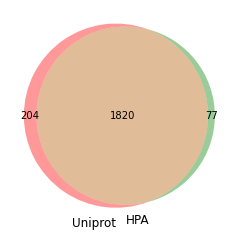

In [104]:
set1=set(uniprot_secretome)
set2=set(hpa_secretome)

venn2([set1, set2], ('Uniprot', 'HPA',))
plt.savefig("venn_secretome_hpa_uniprot.svg")
plt.show()


In [105]:
#set1-set2#genes in uniprot missing in HPA list

In [106]:
with open("HPA_missing_in_uniprot.csv","w") as file:
    for gene in list(set2-set1):
        file.write(gene+"\n")

In [107]:
with open("uniprot_missing_in_HPA.csv","w") as file:
    for gene in list(set1-set2):
        file.write(gene+"\n")

### Curating secretome lists

In [108]:
hpa_curated=pd.read_csv("HPA_missing_in_uniprot_curated.csv")

In [109]:
hpa_curated.head()

,Entrez Gene ID,Gene Symbol,Gene Name,Original Symbol,type
0,49,ACR,acrosin,ACR,secreted
1,49,ACR,acrosin,ACR,secreted
2,56,ACRV1,acrosomal vesicle protein 1,ACRV1,intracellular
3,348094,ANKDD1A,ankyrin repeat and death domain containing 1A,ANKDD1A,intracellular
4,8639,AOC3,amine oxidase copper containing 3,AOC3,membrane


In [110]:
hpa_drop=hpa_curated[hpa_curated["type"]!="secreted"]["Gene Symbol"].values

In [111]:
hpa_secretome_clean=(hpa_secretome-set(hpa_drop))

In [112]:
len(hpa_secretome_clean)

1853

In [113]:
hpa_pseudogenes=[]
for gene in pseudogenes:
    if gene in hpa_secretome_clean:
        hpa_pseudogenes.append(gene)

In [114]:
hpa_secretome_clean=(hpa_secretome_clean-set(hpa_pseudogenes))

In [115]:
len(hpa_secretome_clean)

1849

In [116]:
uniprot_curated=pd.read_csv("uniprot_missing_in_HPA_curated.csv")

In [117]:
uniprot_curated.head()

,Entrez Gene ID,Gene Symbol,Gene Name,Original Symbol,type
0,10058,ABCB6,ATP binding cassette subfamily B member 6 (Lan...,ABCB6,membrane
1,80167,ABHD18,abhydrolase domain containing 18,ABHD18,secreted
2,43,ACHE,acetylcholinesterase (Cartwright blood group),ACHE,membrane
3,83440,ADPGK,ADP dependent glucokinase,ADPGK,intracellular
4,10551,AGR2,"anterior gradient 2, protein disulphide isomer...",AGR2,intracellular


In [118]:
uniprot_drop=uniprot_curated[uniprot_curated["type"]!="secreted"]["Gene Symbol"].values

In [119]:
uniprot_secretome_clean=(set(uniprot_secretome)-set(uniprot_drop))

In [120]:
len(uniprot_secretome_clean)

1861

In [121]:
uniprot_pseudogenes=[]
for gene in pseudogenes:
    if gene in uniprot_secretome_clean:
        uniprot_pseudogenes.append(gene)

In [122]:
len(uniprot_pseudogenes)

4

In [123]:
uniprot_secretome_clean=(uniprot_secretome_clean-set(uniprot_pseudogenes))

In [124]:
len(uniprot_secretome_clean)

1857

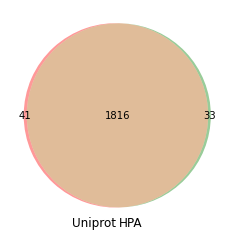

In [125]:
set1=set(uniprot_secretome_clean)
set2=set(hpa_secretome_clean)

venn2([set1, set2], ('Uniprot', 'HPA',))
plt.savefig("venn_secretome_hpa_uniprot.svg")
plt.show()


In [126]:
with open("HPA_missing_in_uniprot_clean.csv","w") as file:
    for gene in list(set2-set1):
        file.write(gene+"\n")

In [127]:
with open("uniprot_missing_in_HPA_clean.csv","w") as file:
    for gene in list(set1-set2):
        file.write(gene+"\n")

Merging lists of included genes from the secretome of HPA and uniprot

In [128]:
secretome_included=set(list(hpa_secretome_clean)+list(uniprot_secretome_clean))

In [129]:
len(secretome_included)

1890

In [130]:
np.save("secretome_included_V11.npy",secretome_included)

In [131]:
#Run only once
with open("secretome_included_V11.csv","w") as file:
    for gene in secretome_included:
        file.write(gene+"\n")

## Calculating Secretory Index for each sample

Making a new dataframe to hold the secretory sums of all samples

In [132]:
secretome_included=(pd.read_csv("secretome_included_V11.csv",header=None))[0].tolist()

In [133]:
secretome_included[0:10]

['SERPINB5',
 'IGHV6-1',
 'CGB3',
 'WNT7A',
 'DEFB126',
 'ARSI',
 'RETN',
 'NPPC',
 'SCGB2A1',
 'HHIPL1']

In [134]:
len(secretome_included)

1890

In [135]:
secreted_sum=pd.DataFrame(index=results.columns,data=results.loc[secretome_included,:].sum(axis=0),columns=["secreted"])

In [136]:
secreted_sum.head()

,secreted
GSM741172,43700.320312
GSM741170,44553.281250
GSM741171,47146.390625
GSM907015,141735.062500
GSM1193921,248621.218750


In [137]:
secreted_sum.to_csv("secretome_sum_V11_TPM.csv")

In [138]:
total_depth=results.sum(axis=0)

In [139]:
total_depth[0:10]

GSM741172     9.687325e+05
GSM741170     9.719659e+05
GSM741171     9.686327e+05
GSM907015     9.640839e+05
GSM1193921    8.861394e+06
GSM1098188    9.790076e+05
GSM1193928    8.863068e+06
GSM1048186    9.349798e+05
GSM1216828    9.830719e+05
GSM1241249    9.666486e+05
dtype: float32

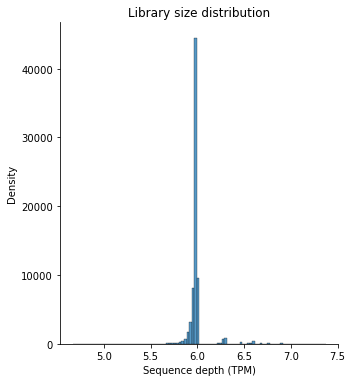

In [140]:
ax=sns.displot(np.log10(total_depth),bins=100)
ax.set(xlabel='Sequence depth (TPM)',ylabel="Density", title="Library size distribution")
#plt.axvline(5.9, color="k", linestyle="--")
#plt.axvline(6.1, color="k", linestyle="--")
plt.savefig("depth_full_protein-coding-only.svg")

In [141]:
si=(secreted_sum.secreted/pd.Series(total_depth))*1000000

In [142]:
si.head()

GSM741172      45110.820312
GSM741170      45838.316406
GSM741171      48673.132812
GSM907015     147015.281250
GSM1193921     28056.671875
dtype: float32

In [143]:
si.astype(int).to_csv("si_V11_TPM.csv")

### Secretome allocation as percentage of the transcriptome

In [144]:
percentage=(secreted_sum.secreted/pd.Series(total_depth))*100

In [145]:
percentage.to_csv("si_V11_TPM_percentage.csv")

In [146]:
percentage.head()

GSM741172      4.511082
GSM741170      4.583831
GSM741171      4.867313
GSM907015     14.701528
GSM1193921     2.805667
dtype: float32

In [147]:
percentage=pd.DataFrame(percentage)

In [148]:
percentage.columns=["percentage"]

In [149]:
percentage.head()

,percentage
GSM741172,4.511082
GSM741170,4.583831
GSM741171,4.867313
GSM907015,14.701528
GSM1193921,2.805667


In [150]:
percentage.sort_values(by="percentage",ascending=False).head(10)

,percentage
GSM3550861,93.676804
GSM3550058,93.138412
GSM3350530,91.704910
GSM2173867,90.983841
GSM2171214,90.237587
GSM3547432,89.875725
GSM2173820,89.825500
GSM2171213,89.709068
GSM2173769,89.387299
GSM3547431,88.843170


In [151]:
sample_types=pd.read_csv("samples_types_tpm.csv")
sample_types.drop(labels="index",axis=1,inplace=True)
sample_types.set_index("geo_id",inplace=True,drop=False)
sample_types.head()

,geo_id,type
geo_id,,
GSM2132128,GSM2132128,Podocyte
GSM2132132,GSM2132132,Podocyte
GSM2132130,GSM2132130,Podocyte
GSM2132129,GSM2132129,Podocyte
GSM2132133,GSM2132133,Podocyte


In [152]:
sample_types.shape

(71961, 2)

In [153]:
secre_cell_type=percentage.copy()

In [154]:
secre_cell_type["cell_type"]=np.nan
secre_cell_type.head()

,percentage,cell_type
GSM741172,4.511082,NaN
GSM741170,4.583831,NaN
GSM741171,4.867313,NaN
GSM907015,14.701528,NaN
GSM1193921,2.805667,NaN


In [155]:
for sample in secre_cell_type.index.values:
    secre_cell_type.loc[sample,"cell_type"]=sample_types.loc[sample,"type"]

In [156]:
secre_cell_type.head()

,percentage,cell_type
GSM741172,4.511082,HELA
GSM741170,4.583831,HELA
GSM741171,4.867313,HELA
GSM907015,14.701528,Macrophage
GSM1193921,2.805667,MDAMB231


In [157]:
secre_cell_type.sort_values(by="percentage",ascending=False).head(10)

,percentage,cell_type
GSM3550861,93.676804,Pancreatic Islet
GSM3550058,93.138412,Pancreatic Islet
GSM3350530,91.704910,Plasma Cell
GSM2173867,90.983841,Pancreatic Islet
GSM2171214,90.237587,Plasma Cell
GSM3547432,89.875725,Pancreatic Islet
GSM2173820,89.825500,Pancreatic Islet
GSM2171213,89.709068,Plasma Cell
GSM2173769,89.387299,Pancreatic Islet
GSM3547431,88.843170,Pancreatic Islet


In [158]:
secre_cell_type.groupby(by=["cell_type"])["percentage"].mean().sort_values(ascending=False)

cell_type
Plasma Cell         54.829323
Pancreatic Islet    32.999203
Chondrocyte         26.976515
Hepatocyte          24.602539
Beta Cell           22.529114
                      ...    
HEK293               1.920444
K562                 1.906695
IMR32                1.886769
FLPIN TREX 293       1.689127
Thymocyte            1.256572
Name: percentage, Length: 78, dtype: float32

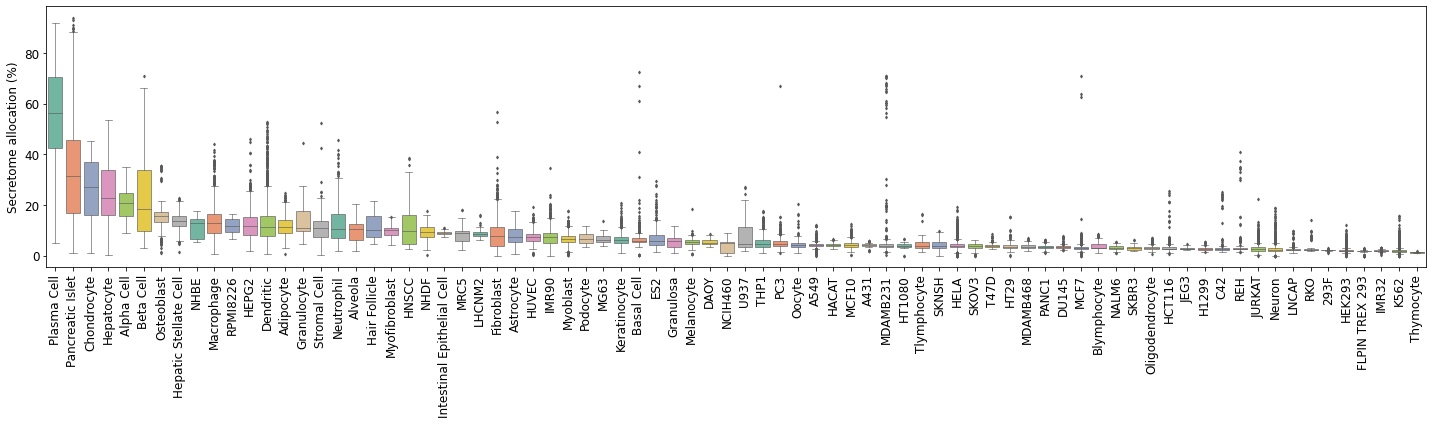

In [159]:
my_order = secre_cell_type.groupby(by=["cell_type"])["percentage"].median().sort_values(ascending=False).index
plt.figure(figsize=(20, 6))
ax=sns.boxplot(x="cell_type",y="percentage",data=secre_cell_type.sort_values(by="percentage",ascending=False), linewidth=0.6,palette="Set2",order=my_order,fliersize=2)
ax.set_xlabel("",fontsize=23)
ax.set_ylabel("Secretome allocation (%)",fontsize=12)

ax.tick_params(labelsize=12)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
#plt.setp(ax.get_xticklabels(), rotation=45)
plt.tight_layout()
ax.figure.savefig("si_percentage_raw.svg",bbox_inches="tight")

array([[<AxesSubplot:title={'center':'percentage'}>]], dtype=object)

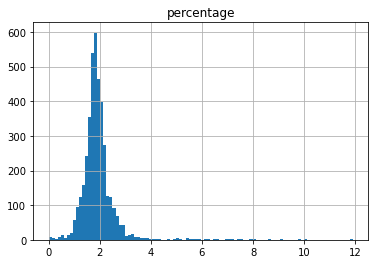

In [160]:
secre_cell_type[secre_cell_type["cell_type"]=="HEK293"].sort_values(by="percentage",ascending=False).hist(bins=100)

## Removing outliers

In [161]:
secre_cell_type.sort_values(by="percentage",ascending=False).head()

,percentage,cell_type
GSM3550861,93.676804,Pancreatic Islet
GSM3550058,93.138412,Pancreatic Islet
GSM3350530,91.704910,Plasma Cell
GSM2173867,90.983841,Pancreatic Islet
GSM2171214,90.237587,Plasma Cell


In [162]:
cell_types=secre_cell_type.groupby(by=["cell_type"])["percentage"].mean().index.values

In [163]:
outliers=[]
for cell_type in cell_types:
    subset=secre_cell_type[secre_cell_type["cell_type"]==cell_type]
    subset.insert(2,"z-score",stats.zscore(subset["percentage"]))
    outliers.extend(subset[subset["z-score"].abs()>=2].index.values)

In [164]:
len(outliers)

2489

In [165]:
results.shape

(20842, 71939)

In [166]:
results.drop(columns=outliers,inplace=True)

In [167]:
results.shape

(20842, 69450)

In [168]:
secre_cell_type.drop(index=outliers,inplace=True)

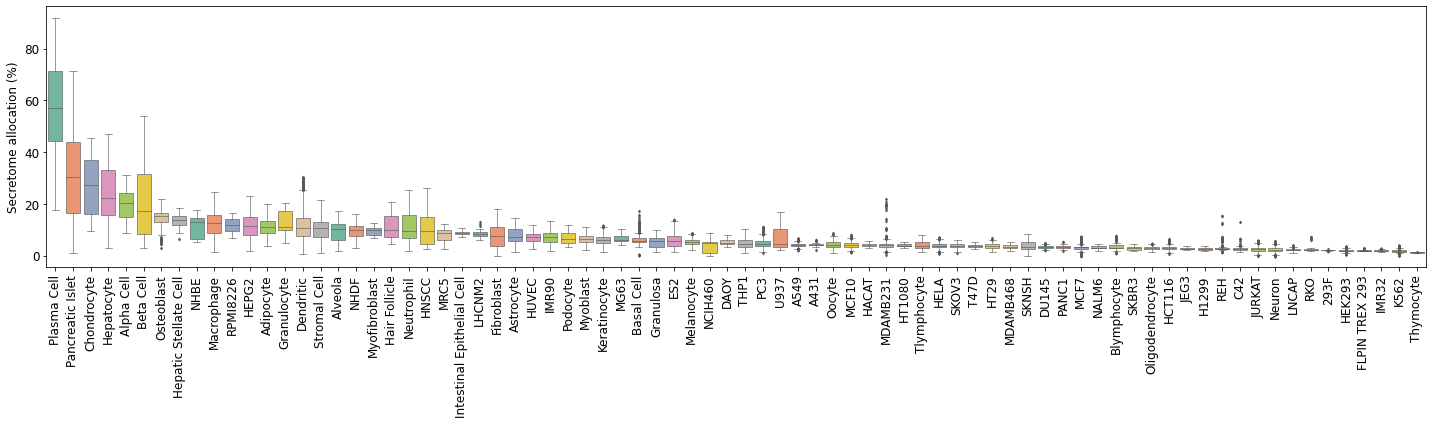

In [169]:
my_order = secre_cell_type.groupby(by=["cell_type"])["percentage"].median().sort_values(ascending=False).index
plt.figure(figsize=(20, 6))
ax=sns.boxplot(x="cell_type",y="percentage",data=secre_cell_type.sort_values(by="percentage",ascending=False), linewidth=0.6,palette="Set2",order=my_order,fliersize=2)
ax.set_xlabel("",fontsize=23)
ax.set_ylabel("Secretome allocation (%)",fontsize=12)

ax.tick_params(labelsize=12)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
#plt.setp(ax.get_xticklabels(), rotation=45)
plt.tight_layout()
ax.figure.savefig("si_percentage_raw.svg",bbox_inches="tight")

## 2nd outlier removal

In [170]:
cell_types=secre_cell_type.groupby(by=["cell_type"])["percentage"].mean().index.values
outliers=[]
for cell_type in cell_types:
    subset=secre_cell_type[secre_cell_type["cell_type"]==cell_type]
    subset.insert(2,"z-score",stats.zscore(subset["percentage"]))
    outliers.extend(subset[subset["z-score"].abs()>=2].index.values)

In [171]:
len(outliers)

2936

In [172]:
results.shape

(20842, 69450)

In [173]:
results.drop(columns=outliers,inplace=True)

In [174]:
results.shape

(20842, 66514)

In [175]:
secre_cell_type.drop(index=outliers,inplace=True)

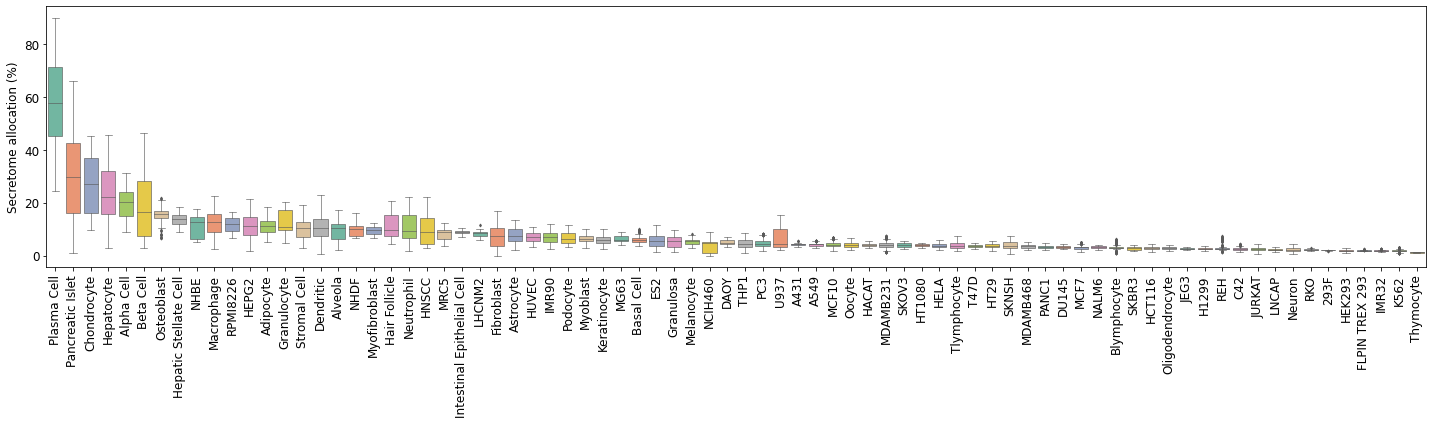

In [176]:
my_order = secre_cell_type.groupby(by=["cell_type"])["percentage"].median().sort_values(ascending=False).index
plt.figure(figsize=(20, 6))
ax=sns.boxplot(x="cell_type",y="percentage",data=secre_cell_type.sort_values(by="percentage",ascending=False), linewidth=0.6,palette="Set2",order=my_order,fliersize=2)
ax.set_xlabel("",fontsize=23)
ax.set_ylabel("Secretome allocation (%)",fontsize=12)

ax.tick_params(labelsize=12)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
#plt.setp(ax.get_xticklabels(), rotation=45)
plt.tight_layout()
ax.figure.savefig("si_percentage_raw.svg",bbox_inches="tight")

## 3rd outlier remove

In [177]:
cell_types=secre_cell_type.groupby(by=["cell_type"])["percentage"].mean().index.values
outliers=[]
for cell_type in cell_types:
    subset=secre_cell_type[secre_cell_type["cell_type"]==cell_type]
    subset.insert(2,"z-score",stats.zscore(subset["percentage"]))
    outliers.extend(subset[subset["z-score"].abs()>=2].index.values)

In [178]:
len(outliers)

2289

In [179]:
results.shape

(20842, 66514)

In [180]:
results.drop(columns=outliers,inplace=True)

In [181]:
results.shape

(20842, 64225)

In [182]:
secre_cell_type.drop(index=outliers,inplace=True)

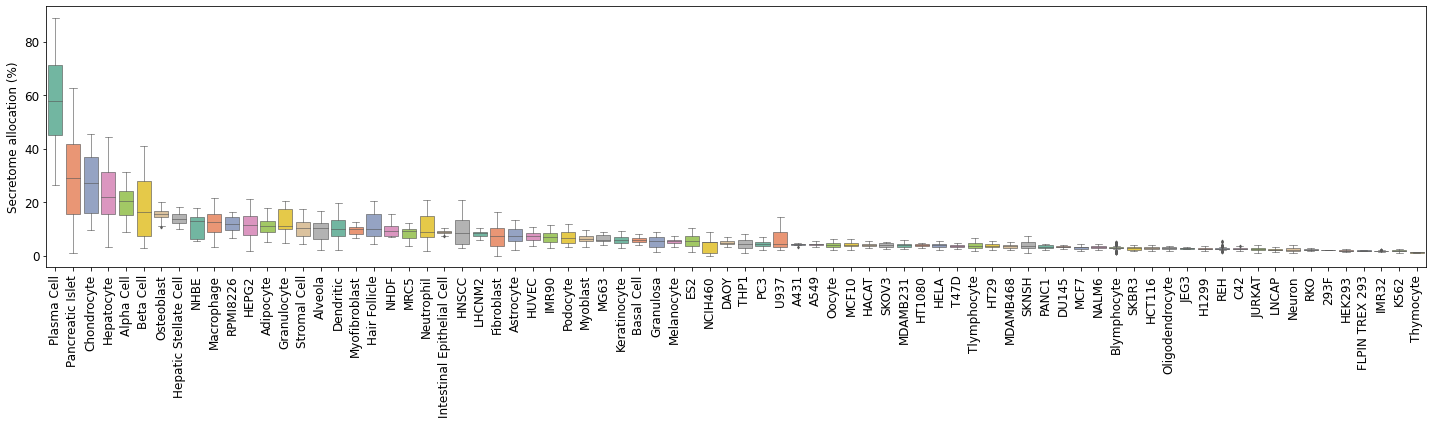

In [183]:
my_order = secre_cell_type.groupby(by=["cell_type"])["percentage"].median().sort_values(ascending=False).index
plt.figure(figsize=(20, 6))
ax=sns.boxplot(x="cell_type",y="percentage",data=secre_cell_type.sort_values(by="percentage",ascending=False), linewidth=0.6,palette="Set2",order=my_order,fliersize=2)
ax.set_xlabel("",fontsize=23)
ax.set_ylabel("Secretome allocation (%)",fontsize=12)

ax.tick_params(labelsize=12)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
#plt.setp(ax.get_xticklabels(), rotation=45)
plt.tight_layout()
ax.figure.savefig("si_percentage_raw.svg",bbox_inches="tight")

## 4th outliers remove

In [184]:
cell_types=secre_cell_type.groupby(by=["cell_type"])["percentage"].mean().index.values
outliers=[]
for cell_type in cell_types:
    subset=secre_cell_type[secre_cell_type["cell_type"]==cell_type]
    subset.insert(2,"z-score",stats.zscore(subset["percentage"]))
    outliers.extend(subset[subset["z-score"].abs()>=2].index.values)

In [185]:
len(outliers)

1654

In [186]:
results.shape

(20842, 64225)

In [187]:
results.drop(columns=outliers,inplace=True)

In [188]:
results.shape

(20842, 62571)

In [189]:
secre_cell_type.drop(index=outliers,inplace=True)

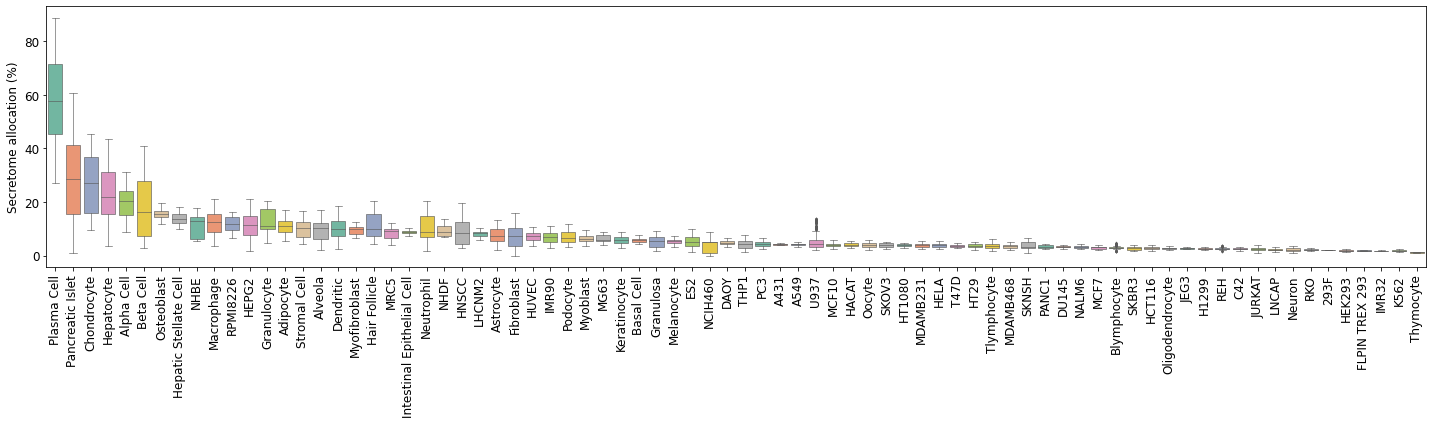

In [190]:
my_order = secre_cell_type.groupby(by=["cell_type"])["percentage"].median().sort_values(ascending=False).index
plt.figure(figsize=(20, 6))
ax=sns.boxplot(x="cell_type",y="percentage",data=secre_cell_type.sort_values(by="percentage",ascending=False), linewidth=0.6,palette="Set2",order=my_order,fliersize=2)
ax.set_xlabel("",fontsize=23)
ax.set_ylabel("Secretome allocation (%)",fontsize=12)

ax.tick_params(labelsize=12)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
#plt.setp(ax.get_xticklabels(), rotation=45)
plt.tight_layout()
ax.figure.savefig("si_percentage_raw.svg",bbox_inches="tight")

array([[<AxesSubplot:title={'center':'percentage'}>]], dtype=object)

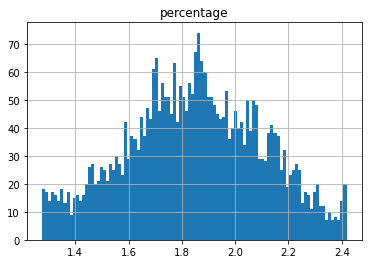

In [191]:
secre_cell_type[secre_cell_type["cell_type"]=="HEK293"].sort_values(by="percentage",ascending=False).hist(bins=100)

In [192]:
secre_cell_type[secre_cell_type["cell_type"]=="HEK293"].sort_values(by="percentage",ascending=False).mean()

percentage    1.843893
dtype: float32

In [193]:
secre_cell_type[secre_cell_type["cell_type"]=="HEK293"].sort_values(by="percentage",ascending=False).std()

percentage    0.25724
dtype: float32

array([[<AxesSubplot:title={'center':'percentage'}>]], dtype=object)

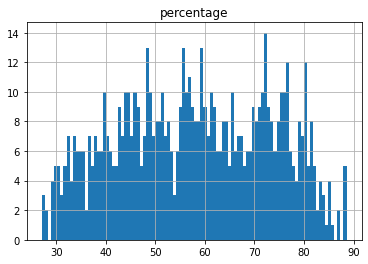

In [194]:
secre_cell_type[secre_cell_type["cell_type"]=="Plasma Cell"].sort_values(by="percentage",ascending=False).hist(bins=100)

array([[<AxesSubplot:title={'center':'percentage'}>]], dtype=object)

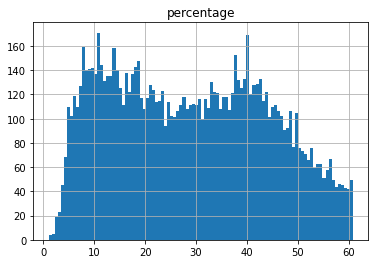

In [195]:
secre_cell_type[secre_cell_type["cell_type"]=="Pancreatic Islet"].sort_values(by="percentage",ascending=False).hist(bins=100)

In [196]:
n_samples=pd.DataFrame(secre_cell_type["cell_type"].value_counts(ascending=False))
n_samples.columns=["counts"]

In [197]:
n_samples.tail()

,counts
Alpha Cell,23
MG63,20
JEG3,19
NCIH460,14
Thymocyte,9


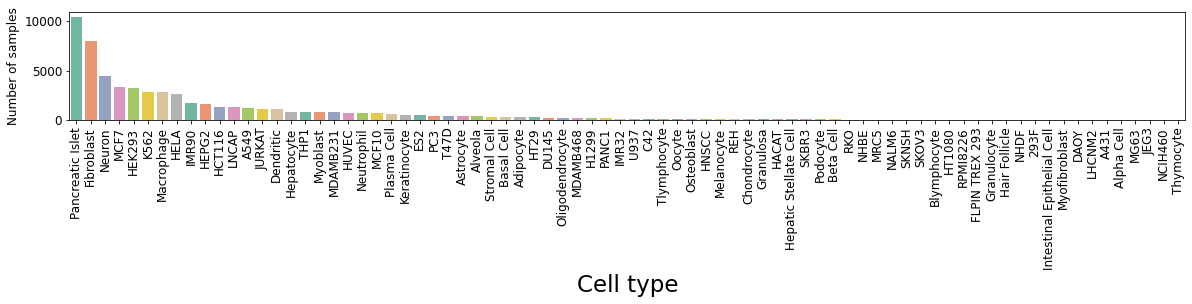

In [198]:
plt.figure(figsize=(20, 2))
ax=sns.barplot(data=n_samples,x=n_samples.index.values,y=n_samples["counts"].values, linewidth=0.6,palette="Set2",order=n_samples.index.values)
ax.set_xlabel("Cell type",fontsize=23)
ax.set_ylabel("Number of samples",fontsize=12)
ax.tick_params(labelsize=12)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.figure.savefig("tpm_nsamps_no_outliers.svg",bbox_inches="tight",facecolor="w")

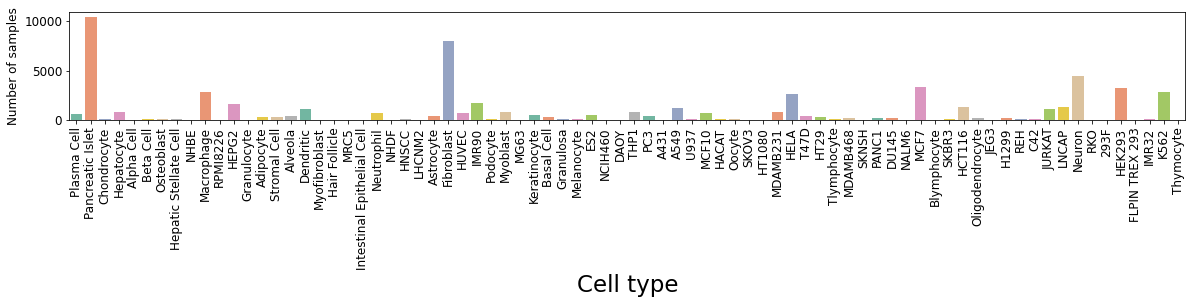

In [199]:
plt.figure(figsize=(20, 2))
ax=sns.barplot(data=n_samples,x=n_samples.index.values,y=n_samples["counts"].values, linewidth=0.6,palette="Set2",order=my_order)
ax.set_xlabel("Cell type",fontsize=23)
ax.set_ylabel("Number of samples",fontsize=12)
ax.tick_params(labelsize=12)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.figure.savefig("tpm_nsamps_ordered_no_outliers.svg",bbox_inches="tight",facecolor="w")

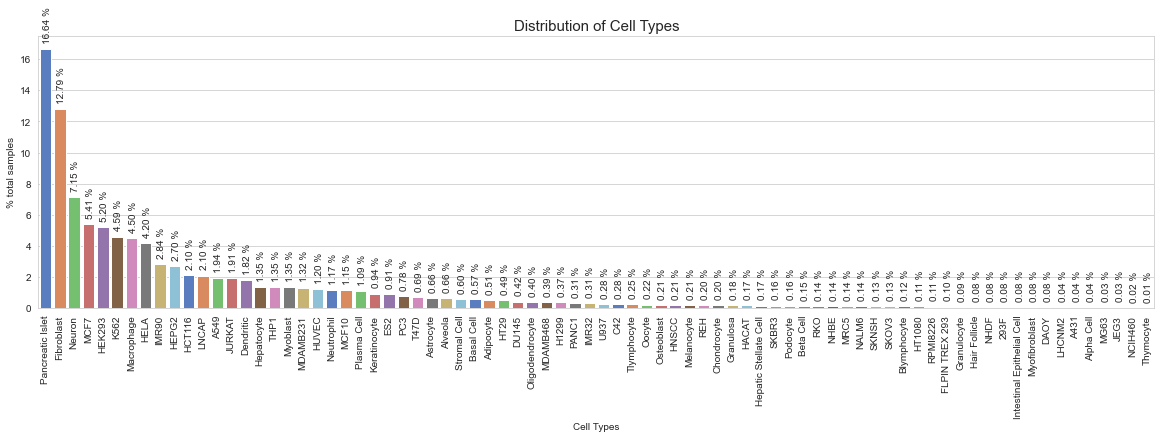

In [200]:
percentage_cells=pd.DataFrame((n_samples["counts"]/n_samples["counts"].sum())*100)
#Seaborn Horizontal barplot
sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(20,5))
ax = sns.barplot(x=percentage_cells.index, y="counts", data=percentage_cells, ci=None, palette="muted",orient='v' )
ax.set_title("Distribution of Cell Types", fontsize=15)
ax.set_xlabel ("Cell Types")
ax.set_ylabel ("% total samples")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
for rect in ax.patches:
    ax.text (rect.get_x() + (rect.get_width()/2) / 2,rect.get_height()+0.5,"%.2f %%"% rect.get_height(), weight='light',rotation=90 )
bar.savefig("cell_types_percentage_no_outliers.svg",bbox_inches="tight")

In [201]:
secre_cell_type.head()

,percentage,cell_type
GSM741172,4.511082,HELA
GSM741170,4.583831,HELA
GSM741171,4.867313,HELA
GSM907015,14.701528,Macrophage
GSM1193921,2.805667,MDAMB231


In [202]:
secre_cell_type.shape

(62571, 2)

In [203]:
secre_cell_type["SI"]=secre_cell_type["percentage"]*100

In [204]:
secre_cell_type.head()

,percentage,cell_type,SI
GSM741172,4.511082,HELA,451.108215
GSM741170,4.583831,HELA,458.383118
GSM741171,4.867313,HELA,486.731323
GSM907015,14.701528,Macrophage,1470.152710
GSM1193921,2.805667,MDAMB231,280.566711


In [205]:
secre_cell_type[["cell_type","SI"]]

,cell_type,SI
GSM741172,HELA,451.108215
GSM741170,HELA,458.383118
GSM741171,HELA,486.731323
GSM907015,Macrophage,1470.152710
GSM1193921,MDAMB231,280.566711
...,...,...
GSM5577336,HUVEC,533.530457
GSM5577337,HUVEC,535.783203
GSM5580099,Macrophage,1309.310547
GSM5580100,Macrophage,1300.081299


In [206]:
si=secre_cell_type[["cell_type","SI"]]

In [207]:
si["SI"]=si["SI"].astype(int)

<ipython-input-207-3b40d5212059>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  si["SI"]=si["SI"].astype(int)


In [208]:
si.head()

,cell_type,SI
GSM741172,HELA,451
GSM741170,HELA,458
GSM741171,HELA,486
GSM907015,Macrophage,1470
GSM1193921,MDAMB231,280


In [209]:
si.to_csv("si_V11_TPM_noutliers.csv")

In [210]:
secre_cell_type.to_csv("si_percentage_ctype_no_outliers.csv")

In [211]:
results.shape

(20842, 62571)

In [212]:
np.save("genes_tpm_v11_clean_noutliers",results.index.values)
np.save("samples_tpm_v11_clean_noutliers",results.columns.values)
np.save("results_tpm_v11_clean_noutliers",results.values)

In [213]:
total_depth=results.sum(axis=0)

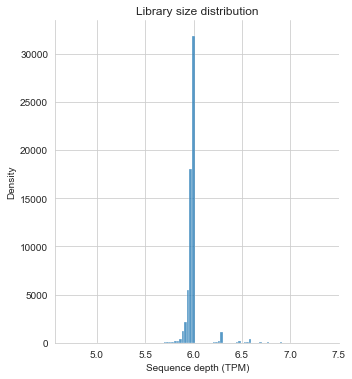

In [214]:
ax=sns.displot(np.log10(total_depth),bins=100)
ax.set(xlabel='Sequence depth (TPM)',ylabel="Density", title="Library size distribution")
#plt.axvline(5.9, color="k", linestyle="--")
#plt.axvline(6.1, color="k", linestyle="--")
plt.savefig("depth_no_outliers_protein-coding-only.svg")

### Normality tests

In [215]:
from scipy.stats import shapiro
from scipy.stats import normaltest

In [216]:
for cell_type in cell_types:
    if len(secre_cell_type[secre_cell_type["cell_type"]==cell_type]["percentage"].values) <=2:
        print (cell_type)

In [217]:
normality=pd.DataFrame(columns=["stat","p"])
for cell_type in cell_types:
    stat,p=shapiro(secre_cell_type[secre_cell_type["cell_type"]==cell_type]["percentage"].values)
    normality.loc[cell_type]=[stat,p]

/home/manuel/anaconda3/envs/ds/lib/python3.9/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [218]:
normality[normality["p"]>0.05]#normal samples

,stat,p
A431,0.951834,0.255905
Alpha Cell,0.972402,0.746244
C42,0.990774,0.325006
DAOY,0.965555,0.169034
FLPIN TREX 293,0.977433,0.319401
JEG3,0.915039,0.091642
LHCNM2,0.971551,0.663847
MG63,0.954902,0.447650
Melanocyte,0.980553,0.059079
Osteoblast,0.984114,0.124542


In [219]:
normality[normality["p"]<0.05]#not normal

,stat,p
293F,0.955371,4.937715e-02
A549,0.986767,4.658671e-09
Adipocyte,0.983215,9.222590e-04
Alveola,0.939975,7.281781e-12
Astrocyte,0.966578,3.972896e-08
...,...,...
Stromal Cell,0.968123,2.396185e-07
T47D,0.974695,8.384308e-07
THP1,0.956918,4.821934e-15
Tlymphocyte,0.961978,2.619649e-04


In [220]:
secre_cell_type.head()

,percentage,cell_type,SI
GSM741172,4.511082,HELA,451.108215
GSM741170,4.583831,HELA,458.383118
GSM741171,4.867313,HELA,486.731323
GSM907015,14.701528,Macrophage,1470.152710
GSM1193921,2.805667,MDAMB231,280.566711


In [221]:
data=secre_cell_type[secre_cell_type["cell_type"]=="HEK293"]

array([[<AxesSubplot:title={'center':'percentage'}>,
        <AxesSubplot:title={'center':'SI'}>]], dtype=object)

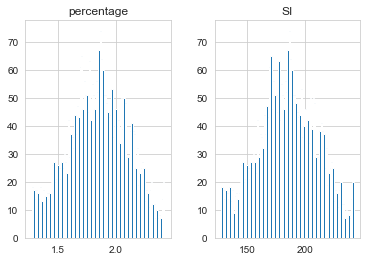

In [222]:
data.hist(bins=100)

In [223]:
data.shape

(3251, 3)

In [224]:
from statsmodels.graphics.gofplots import qqplot

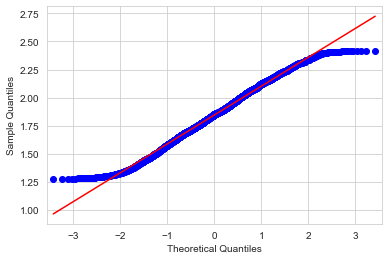

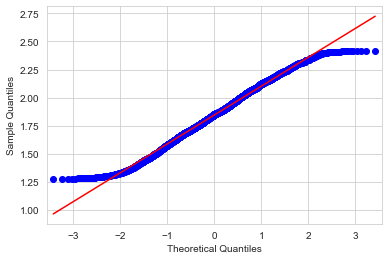

In [225]:
qqplot(data.percentage,line="s")

In [226]:
data=secre_cell_type[secre_cell_type["cell_type"]=="Plasma Cell"]["percentage"]

<AxesSubplot:>

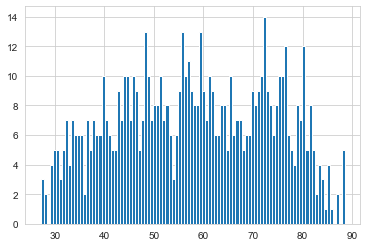

In [227]:
data.hist(bins=100)

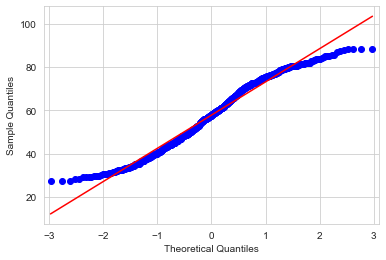

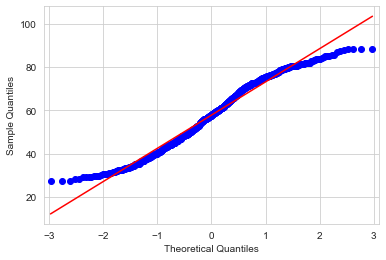

In [228]:
qqplot(data,line="s")

How does the sequencing depth changes after removing the secretome?

In [229]:
results.shape

(20842, 62571)

In [230]:
results.drop(index=secretome_included,inplace=True)

In [231]:
results.shape

(18952, 62571)

In [232]:
total_depth=results.sum(axis=0)

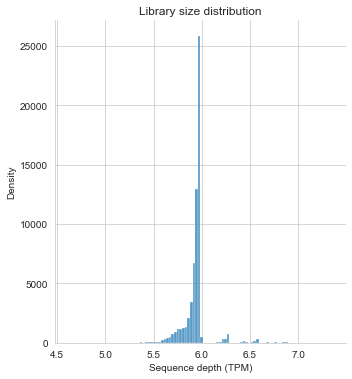

In [233]:
ax=sns.displot(np.log10(total_depth),bins=100)
ax.set(xlabel='Sequence depth (TPM)',ylabel="Density", title="Library size distribution")
#plt.axvline(5.9, color="k", linestyle="--")
#plt.axvline(6.1, color="k", linestyle="--")
plt.savefig("depth_no_outliers_protein-coding-only.svg")